In [1]:
# change working directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

/home/matej/prace/ferda/ferda_github


In [2]:
# %cd ~/prace/ferda/ferda_github/

In [3]:
import os
import pandas as pd
import yaml
from collections import defaultdict
from os.path import join
from utils.gt.mot import load_mot, eval_and_save
from IPython.display import Markdown
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 30)

In [4]:
# from ferda_cli import load_evaluations  # enable after python3 codebase conversion

def load_evaluations(experiments_config):
    evaluations = defaultdict(list)
    for directory, dirnames, filenames in \
            sorted(os.walk(experiments_config['dir']), key=lambda x: os.path.basename(x[0])):
        if directory == experiments_config['dir']:
            continue

        if ('experiment.yaml' in filenames) and ('evaluation.csv' in filenames):
            with open(join(directory, 'experiment.yaml'), 'r') as fr:
                experiment_config = yaml.load(fr)

            experiment_config['evaluation'] = join(directory, 'evaluation.csv')
            if 'results.txt' in filenames:
                experiment_config['mot_trajectories'] = join(directory, 'results.txt')
            evaluations[experiment_config['dataset_name']].append(experiment_config)
        else:
            pass
#             print('no experiment.yaml and/or evaluation.csv in {}'.format(directory))
    return evaluations

In [5]:
with open('experiments.yaml', 'r') as fr:
    experiments = yaml.load(fr)
evaluations = load_evaluations(experiments)

In [6]:
# # revaluate all
# for dataset, dataset_experiments in evaluations.items():
#     for experiment in dataset_experiments:
#         print(experiment['mot_trajectories'])
#         eval_and_save(experiment['dataset']['gt'], experiment['mot_trajectories'], experiment['evaluation'])

# Benchmarks

## Cam1_clip

,num_frames,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_fragmentations,motp,mota,precision,recall,idfp,idfn,idtp,idp,idr,idf1,motp_px
experiment,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,4500,16408,18,0,10574,16426,27000,16426,6,1,5,0,259,63.196044,0.607704,1.000000,0.608370,67.0,10641.0,16359.0,0.995921,0.605889,0.753420,7.949594
idtracker_nogaps,4500,24293,2,7,2705,24295,27000,24302,6,6,0,0,35,133.556985,0.899481,0.999712,0.899815,14.0,2712.0,24288.0,0.999424,0.899556,0.946864,11.556686
toxtrac_tight_segmentation,4500,14048,13,0,12939,14061,27000,14061,6,0,6,0,122,195.002656,0.520296,1.000000,0.520778,658.0,13597.0,13403.0,0.953204,0.496407,0.652834,13.964335
toxtrac,4500,11471,167,0,15362,11638,27000,11638,6,0,6,0,166,133.370349,0.424852,1.000000,0.431037,9762.0,25124.0,1876.0,0.161196,0.069481,0.097106,11.548608
180427_vaib,4500,18898,6,0,8096,18904,27000,18904,6,2,4,0,288,1.974294,0.699926,1.000000,0.700148,16.0,8112.0,18888.0,0.999154,0.699556,0.822935,1.405096
initial,4500,19126,46,9,7828,19172,27000,19181,6,3,3,0,367,167.486351,0.708037,0.999531,0.710074,1820.0,9639.0,17361.0,0.905114,0.643000,0.751868,12.941652
fixed_cardinality,4500,19000,34,1,7966,19034,27000,19035,6,2,4,0,355,138.025728,0.703667,0.999947,0.704963,1167.0,9132.0,17868.0,0.938692,0.661778,0.776279,11.748435


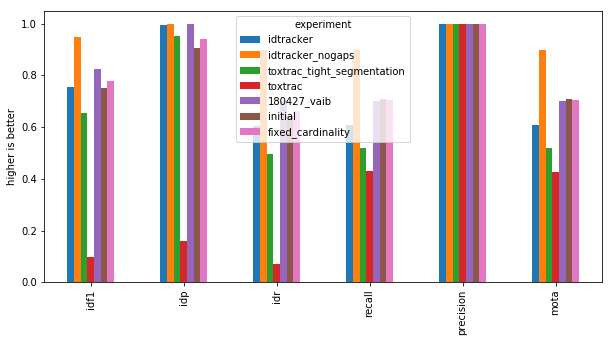

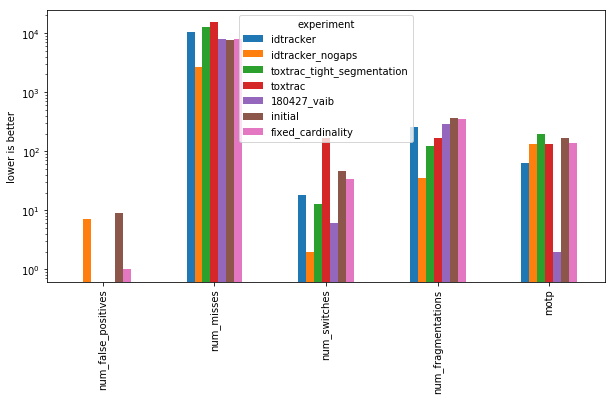

## Sowbug3_cut

,num_frames,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_fragmentations,motp,mota,precision,recall,idfp,idfn,idtp,idp,idr,idf1,motp_px
experiment,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,6734,20124,4,6,13542,20128,33670,20134,5,0,5,0,41,151.559629,0.597505,0.999702,0.597802,383.0,13919.0,19751.0,0.980977,0.586605,0.734183,12.310956
idtracker_nogaps,6734,22483,4,6,11183,22487,33670,22493,5,0,5,0,2,146.714984,0.667568,0.999733,0.667865,383.0,11560.0,22110.0,0.982972,0.656668,0.787351,12.112596
toxtrac,6734,18641,2,0,15027,18643,33670,18643,5,0,5,0,18,64.270609,0.553638,1.000000,0.553698,139.0,15166.0,18504.0,0.992544,0.549569,0.707434,8.016895
initial,6734,19932,9,2,13729,19941,33670,19943,5,0,5,0,36,159.596248,0.591922,0.999900,0.592248,4051.0,17778.0,15892.0,0.796871,0.471993,0.592841,12.633141
fixed_cardinality,6734,19810,16,3,13844,19826,33670,19829,5,0,5,0,39,287.155315,0.588268,0.999849,0.588833,5235.0,19076.0,14594.0,0.735993,0.433442,0.545580,16.945658
180819_Sowbug3_cut_new_setup,6734,19829,2,0,13839,19831,33670,19831,5,0,5,0,37,4.948007,0.588922,1.000000,0.588981,20.0,13859.0,19811.0,0.998991,0.588387,0.740584,2.224412


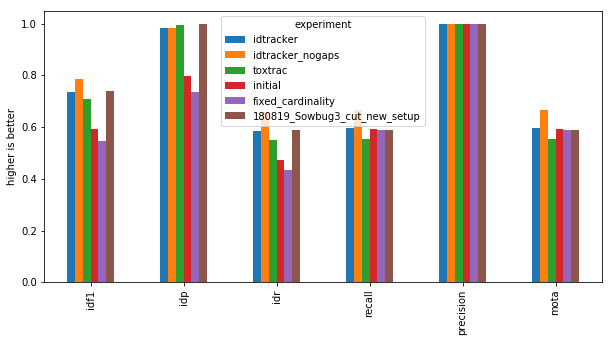

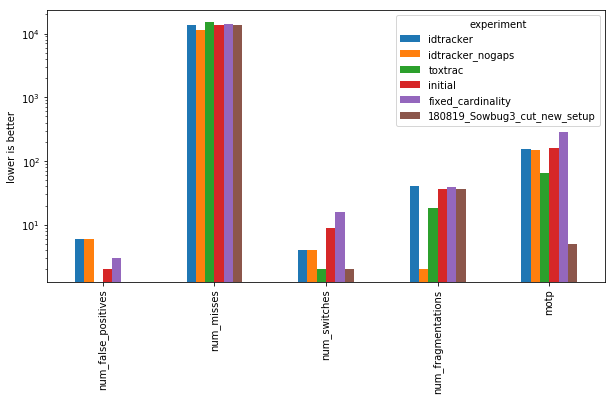

## Camera3-5min

,num_frames,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_fragmentations,motp,mota,precision,recall,idfp,idfn,idtp,idp,idr,idf1,motp_px
experiment,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,4500,40305,14,1,4681,40319,45000,40320,10,10,0,0,247,13.781312,0.895644,0.999975,0.895978,187.0,4867.0,40133.0,0.995362,0.891844,0.940764,3.712319
idtracker_nogaps,4500,44846,0,73,154,44846,45000,44919,10,10,0,0,5,39.111585,0.994956,0.998375,0.996578,73.0,154.0,44846.0,0.998375,0.996578,0.997476,6.253926
toxtrac,4500,34002,108,1,10890,34110,45000,34111,10,5,5,0,210,41.122685,0.755578,0.999971,0.758000,8670.0,19559.0,25441.0,0.745830,0.565356,0.643172,6.412697
180427_vaib,4500,40417,10,1,4573,40427,45000,40428,10,10,0,0,386,4.154986,0.898133,0.999975,0.898378,27.0,4599.0,40401.0,0.999332,0.897800,0.945849,2.038378
initial,4500,16594,29,0,28377,16623,45000,16623,10,0,8,2,73,143.314538,0.368756,1.000000,0.369400,7843.0,36220.0,8780.0,0.528184,0.195111,0.284959,11.971405
fixed_cardinality,4500,36830,77,3,8093,36907,45000,36910,10,7,3,0,442,154.163346,0.818378,0.999919,0.820156,10571.0,18661.0,26339.0,0.713601,0.585311,0.643120,12.416253


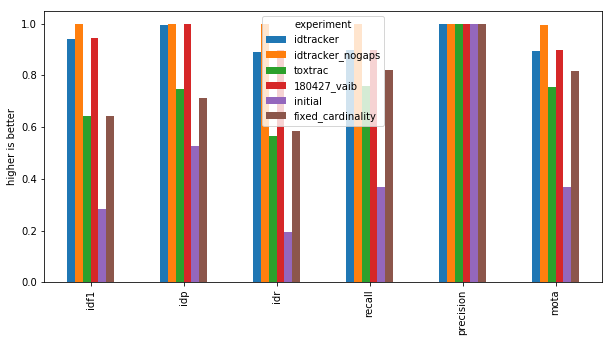

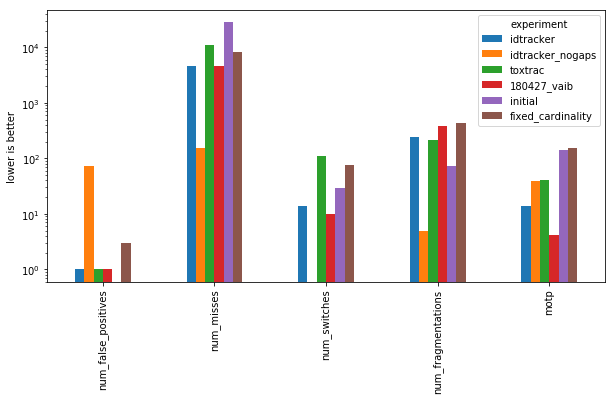

## 5Zebrafish_nocover_22min

,num_frames,num_matches,num_switches,num_false_positives,num_misses,num_detections,num_objects,num_predictions,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_fragmentations,motp,mota,precision,recall,idfp,idfn,idtp,idp,idr,idf1,motp_px
experiment,,,,,,,,,,,,,,,,,,,,,,,,
idtracker,15000,60855,160,353,13985,61015,75000,61368,5,4,1,0,895,75.908890,0.806693,0.994248,0.813533,1407.0,15039.0,59961.0,0.977073,0.799480,0.879400,8.712571
idtracker_nogaps,15000,70933,132,3898,3935,71065,75000,74963,5,5,0,0,234,264.281000,0.893800,0.948001,0.947533,5181.0,5218.0,69782.0,0.930886,0.930427,0.930656,16.256722
toxtrac,15000,64641,0,1,10359,64641,75000,64642,5,5,0,0,311,34.326583,0.861867,0.999985,0.861880,1.0,10359.0,64641.0,0.999985,0.861880,0.925810,5.858889
180427_vaib,15000,66140,29,15,8831,66169,75000,66184,5,5,0,0,987,181.964081,0.881667,0.999773,0.882253,68.0,8884.0,66116.0,0.998973,0.881547,0.936593,13.489406
initial,15000,69707,243,16,5050,69950,75000,69966,5,5,0,0,708,125.085584,0.929213,0.999771,0.932667,36001.0,41035.0,33965.0,0.485450,0.452867,0.468593,11.184167
fixed_cardinality,15000,68298,257,10,6445,68555,75000,68565,5,5,0,0,717,112.147895,0.910507,0.999854,0.914067,29191.0,35626.0,39374.0,0.574258,0.524987,0.548518,10.589990


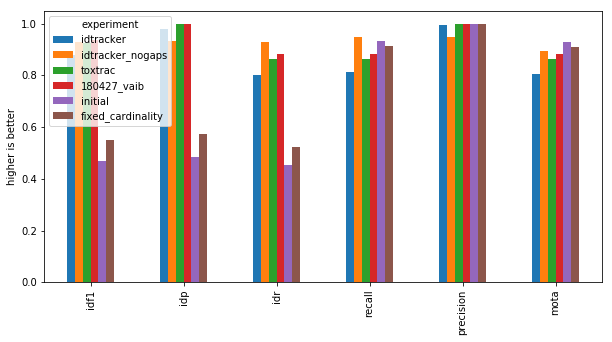

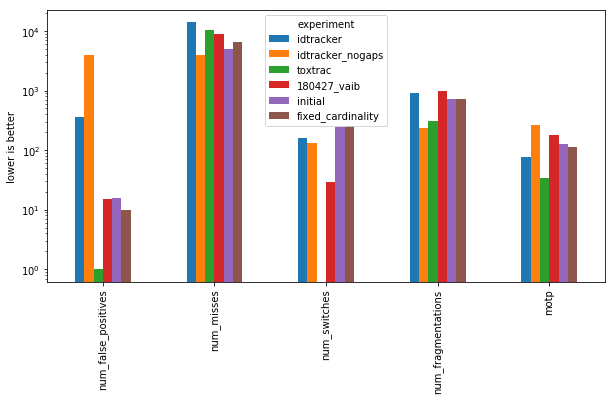

In [7]:
# plot tables and graphs
df_evaluations = {}
for dataset, dataset_experiments in evaluations.items(): 
    all_evals = []
    for experiment in dataset_experiments:
        df = pd.read_csv(experiment['evaluation'])
        df.insert(0, 'experiment', experiment['exp_name'])
        all_evals.append(df)
    df = pd.concat(all_evals).set_index('experiment')
    df.drop(['obj_frequencies', 'pred_frequencies', 'track_ratios', 'id_global_assignment'], axis=1, inplace=True)
    
    df.name = dataset
    display(Markdown('## {experiment_name}'.format(experiment_name=df.name)))
    display(df)
    df_evaluations[df.name] = df
    # df.to_csv('{}_comparison.csv'.format(dataset_name))
    ax = df[['idf1', 'idp', 'idr', 'recall', 'precision','mota']].T.plot.bar(figsize=(10, 5)) # , title='dataset ' + dataset)
    _ = ax.set_ylabel('higher is better')
    plt.show(ax)
    ax = df[['num_false_positives', 'num_misses', 'num_switches','num_fragmentations', 'motp']].T.plot.bar(figsize=(10, 5), logy=True)  # , title='dataset ' + dataset)
    _ = ax.set_ylabel('lower is better')
    plt.show(ax)

## ID Precision Recall Graphs

In [8]:
# # renames for publications
# df_evaluations['Ants1'] = df_evaluations.pop('Cam1_clip')
# df_evaluations['Ants3'] = df_evaluations.pop('Camera3-5min')
# df_evaluations['Zebrafish'] = df_evaluations.pop('5Zebrafish_nocover_22min')
# df_evaluations['Sowbugs3'] = df_evaluations.pop('Sowbug3_cut')

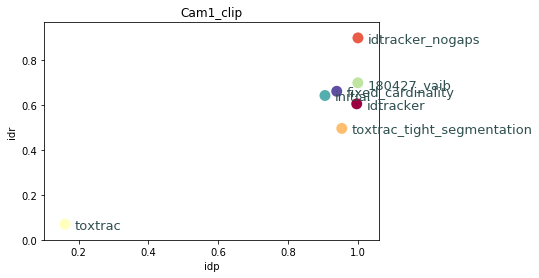

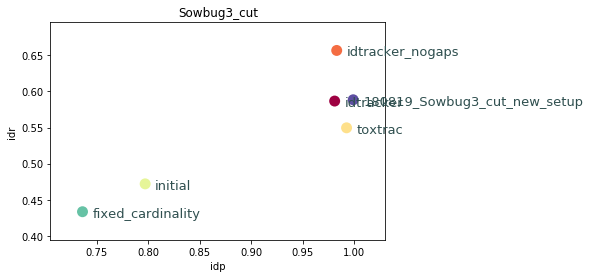

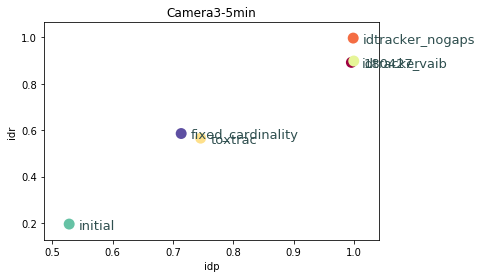

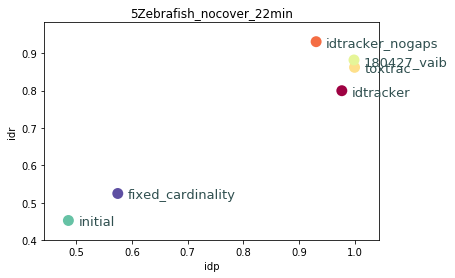

In [9]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
for dataset, df in df_evaluations.items():
#     try:
#         as_list = df.index.tolist()
#         idx = as_list.index('180427_vaib')
#         as_list[idx] = 'ferda'
#         df.index = as_list
#     except:
#         pass
#     try:
#         as_list = df.index.tolist()
#         idx = as_list.index('180819_Sowbug3_cut_new_setup')
#         as_list[idx] = 'ferda'
#         df.index = as_list
#     except:
#         pass    	
#     df = df[~((df.index == 'initial') | (df.index == 'fixed_cardinality') | (df.index == 'toxtrac_tight_segmentation'))]
    fig, ax = plt.subplots()

    df.plot('idp', 'idr', kind='scatter', ax=ax, s=120, linewidth=0, 
            c=range(len(df)), colormap=cmap, colorbar=None, title=dataset)

    for k, v in df.iterrows():
        ax.annotate(k, v[['idp', 'idr']],
                    xytext=(10,-5), textcoords='offset points', 
                    family='sans-serif', fontsize=13, color='darkslategrey')
    # 
    # plt.savefig('../{}.png'.format(dataset), bbox_inches='tight')

In [10]:
# # nteract data explorer playground
# pd.options.display.html.table_schema = True
# pd.options.display.max_rows = None
# df_evaluations['Camera3-5min']